## PCW for Session 8 of CS156

### Performing a PCA analysis

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'unzip'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'unzip'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [11]:
from glob import glob
from PIL import Image
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from resizeimage import resizeimage
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import matplotlib.image as mpimg
from skimage.transform import resize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#first get the images of clothings 
male_clothes_data = glob(r'male-clothing\*')
jerseys_data = glob(r'jersey\*')

male_clothes = []
jerseys = []

In [15]:
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalize pixel values
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

male_clothes = [extract_feature(filename) for filename in male_clothes_data]
jerseys = [extract_feature(filename) for filename in jerseys_data]
print(len(jerseys))
print(len(male_clothes))

0
0


(0,) (0, 1)


IndexError: index 0 is out of bounds for axis 0 with size 0

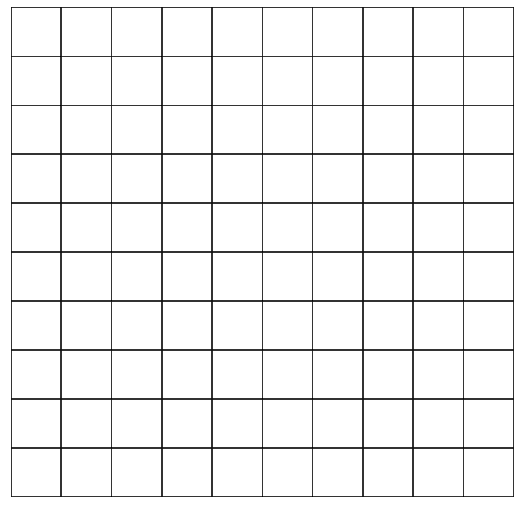

In [19]:
#recize the image so that we can use them to train. 
for path in male_clothes_data:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            if image.mode != "RGB":
                image = image.convert('RGB')
            # image = image.convert('L')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [20, 20])
            # flatten the matrix to an array and append it to all flattened images
            male_clothes.append(np.array(cover).flatten())

for path in jerseys_data:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            if image.mode != "RGB":
                image = image.convert('RGB')
            # image = image.convert('L')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [20, 20])
            # flatten the matrix to an array and append it to all flattened images
            jerseys.append(np.array(cover).flatten())
                 
male_clothes = np.asarray(male_clothes)
jerseys = np.asarray(jerseys)

#prepare the data to be trained in variable X and Y
X = np.concatenate((male_clothes, jerseys))
Y = np.concatenate((np.zeros(len(male_clothes)), np.ones(len(jerseys)))).reshape(-1, 1)
print(X.shape, Y.shape)

#first, show the data that are going to be used for making PCA
fig, axes = plt.subplots(10,10,figsize=(9,9),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(20,20,3), cmap="gray")

In [10]:
#fit the PCA
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca = decomposition.PCA()
pca.fit(X)
rescaled = pca.transform(X)
scaled = pca.inverse_transform(rescaled)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [4]:
#PCW8 LDA(Linear Discriminant Analysis)
x = jerseys + male_clothes
Y = [0 for i in range(len(jerseys))] + [1 for i in range(len(male_clothes))]
LDA = LinearDiscriminatAnalysis()
X = x
y = Y
X_r^2 = LDA.fit(X,y).transform(X)

SyntaxError: cannot assign to operator (Temp/ipykernel_5168/2361098697.py, line 7)

In [3]:
[0 for i in range(5)] + [1 for i in range(5)]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]